In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = sns.get_dataset_names()
df

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df= sns.load_dataset('taxis')
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [5]:
num_cols = df.select_dtypes('number').columns.tolist()
print(num_cols)

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']


In [6]:
cat_cols = df.select_dtypes('object').columns
print(cat_cols)

Index(['color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough',
       'dropoff_borough'],
      dtype='object')


In [7]:
df_simple = df[['distance', 'fare']]

In [8]:
# Drop missing values
df_simple = df_simple.dropna()

In [9]:
# Features & target
X = df_simple[['distance']]
y = df_simple['fare']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
print(type(X_train))
print(X_train.columns)


<class 'pandas.core.frame.DataFrame'>
Index(['distance'], dtype='object')


In [5]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [4]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [14]:
y_pred = model.predict(X_test)

In [ ]:
print(model.predict([[1]]))

[23.82872124]


In [3]:
plt.scatter (X_train,y_train, color = 'red' )
plt.plot(X_train , model.predict(X_train), color = 'blue')
plt.title('Fare vs Distance(Training set)')
plt.xlabel('Distance')
plt.ylabel('Fare')

NameError: name 'X_train' is not defined

Text(0, 0.5, 'Fare')

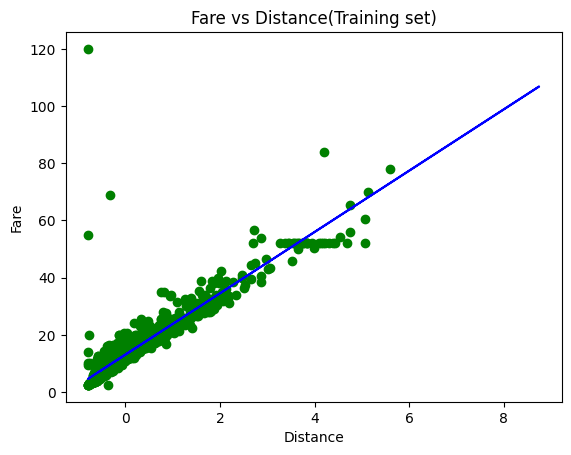

In [19]:
plt.scatter (X_test,y_test, color = 'green' )
plt.plot(X_train , model.predict(X_train), color = 'blue')
plt.title('Fare vs Distance(Training set)')
plt.xlabel('Distance')
plt.ylabel('Fare')

In [ ]:
from joblib import dump, load
with open('models/simple_linear_regression_practice_model.joblib','wb') as f:
    dump(model, f) #dump the model to the file
    print("Model Dumped Successfully")

Model Dumped Successfully
